In [0]:
# 告訴 colab 我要用 2.x 版本 tensorflow
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data
load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
#根據 readme 和如下了解, 總共有10個類別, 最後輸出為10類
a1 =load_data()[0][1]
a2 ={}.fromkeys(a1).keys()
print(sorted(a2))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
#分出訓練資料和測試資料
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


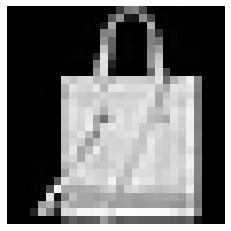

In [5]:
# 先看一下圖片大概長啥樣子
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
plt.axis("off")
p = random.randint(0, 59999)
plt.imshow(x_train[p], cmap="gray")

In [6]:
# 開始建模
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# input 784個像素, 第二層用64個神經元, 784 x 64 + 64(bias)=5,0240 param
model.add(Dense(64, activation="relu", input_dim=784))
# 第三層, 64x 10 + 10=650 個 param
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 評量:compile, 用 CategoricalCrossentropy(交叉滳)原因是為了梯度下降, 交叉滳梯度下降明顯較 MSE 好處理
# adam 考量了動量修正, 步長修正, 用 accuracy 衡量有沒有預測準確
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [8]:
# input 資料預處理, 像素拉長成 1D 像素並且規一化成為 0~1
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
x_train_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# output 資料預處理 one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[5])
print("現在:", y_train_cat[5])

原本: 2
現在: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# 訓練資料 200個看一次, 整部資料共看 18~20 次就好, 太多過擬合
model.fit(x_train_norm, y_train_cat,
          batch_size=200,
          epochs=20,
          validation_split=0.1)

Epoch 1/20
270/270 [==============================] - 1s 4ms/step - loss: 0.6538 - accuracy: 0.7799 - val_loss: 0.4813 - val_accuracy: 0.8357
Epoch 2/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4494 - accuracy: 0.8466 - val_loss: 0.4260 - val_accuracy: 0.8495
Epoch 3/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4106 - accuracy: 0.8574 - val_loss: 0.4056 - val_accuracy: 0.8560
Epoch 4/20
270/270 [==============================] - 1s 3ms/step - loss: 0.3839 - accuracy: 0.8661 - val_loss: 0.3816 - val_accuracy: 0.8647
Epoch 5/20
270/270 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8734 - val_loss: 0.3698 - val_accuracy: 0.8707
Epoch 6/20
270/270 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8764 - val_loss: 0.3686 - val_accuracy: 0.8705
Epoch 7/20
270/270 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8803 - val_loss: 0.3523 - val_accuracy: 0.8748
Epoch 

In [11]:
# 拿模型沒看過的資料測試準度, x_test_norm, y_test_cat
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8765


[0.36027956008911133, 0.8765000104904175]

In [23]:
# predict:給機率, predict_classes:給機率最大的類別
pre = model.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [13]:
# 做出混淆矩陣 confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
mat = confusion_matrix(y_test, pre)
p = ["{}(預測)".format(i) for i in range(10)]
r = ["{}(真實)".format(i) for i in range(10)]
pd.DataFrame(mat, columns=p, index=r)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),847,2,21,44,4,1,66,0,15,0
1(真實),2,965,1,25,3,0,2,0,2,0
2(真實),16,0,858,18,66,0,41,0,1,0
3(真實),14,7,15,930,14,0,15,0,5,0
4(真實),0,0,142,54,750,1,48,0,5,0
5(真實),0,0,0,1,0,961,0,21,2,15
6(真實),152,2,123,58,56,0,593,0,16,0
7(真實),0,0,0,0,0,25,0,954,0,21
8(真實),4,1,6,6,4,3,5,4,966,1
9(真實),0,0,0,0,0,8,1,50,0,941


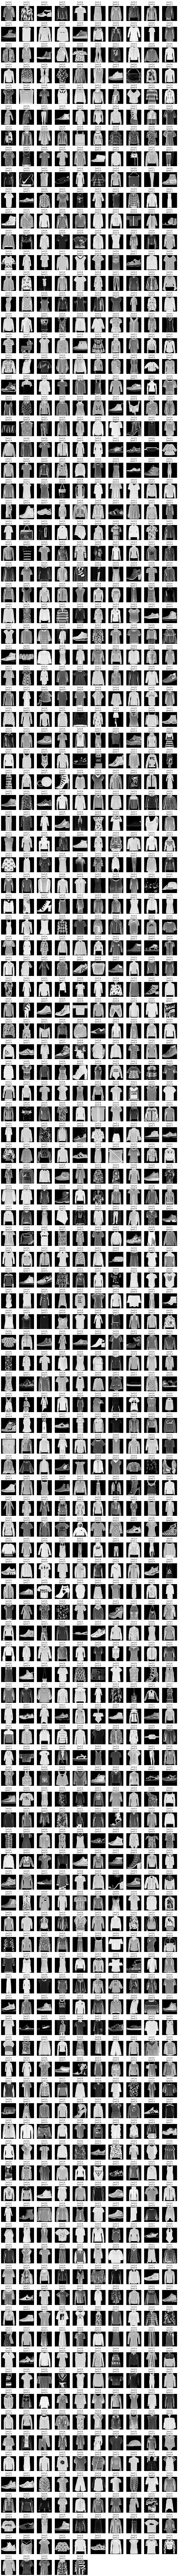

In [22]:
# 畫出那些圖預測錯誤
import numpy as np
# pre!=y_test是預測跟實際不同的叫做 true, np.nonzero是 numpy 的功能, 把不是 0 的拿出來, 
# idx 是指預測錯誤(true)的東西的 index
idx = np.nonzero(pre != y_test)[0]
# numpy 功能,把 預測錯誤的東西一次拿出來, 類似 list[0]拿取座號0的東西, numpy可以一次拿取多個
false_img = x_test[idx] # 預測錯誤的圖
false_ans = y_test[idx] # 預測錯誤的答案
false_pre = pre[idx]    # 預測錯誤的東西本體
# 畫圖
plt.figure(figsize=(20, 300))
width =10 # 寬 10 筆一列
height = len(false_img) // width + 1 # 算出高多少, 為了怕沒整除 +1個高
for i, img in enumerate(false_img):
  plt.subplot(height, width, i+1) # i從0開始, 因此 i+1 開始才是從第一張圖開始
  plt.axis("off")
  t= "[ori]:{}\n[pre]:{}".format(false_ans[i],
                                 false_pre[i])
  plt.title(t)
  plt.imshow(img, cmap="gray")
  # 0:T-shirt/top, 1:褲子, 2:套衫, 3:連衣裙, 4:外套, 5:拖鞋, 6:襯衫, 7:運動鞋, 8:包包, 9:靴子